## Problem Description



### Heart Failure Prediction

Heart failure is a common event caused by cardiovascular diseases. This project aims to predict mortality by heart failure. The dataset sourced from https://www.kaggle.com/andrewmvd/heart-failure-clinical-data contains 299 records with 12 features and a binary label that indicates the death event of the patient.

## EDA

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# Loading and displaying the dataset
# The dataset is sourced from: https://www.kaggle.com/andrewmvd/heart-failure-clinical-data
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")

In [ ]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


### Missing value counts
No missing values...

In [ ]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [ ]:
df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

### Ranges of feature values

In [ ]:
for col in df.columns:
  print(col)
  print(df[col].unique()[:5])
  print(df[col].nunique())

age
[75. 55. 65. 50. 90.]
47
anaemia
[0 1]
2
creatinine_phosphokinase
[ 582 7861  146  111  160]
208
diabetes
[0 1]
2
ejection_fraction
[20 38 40 15 60]
17
high_blood_pressure
[1 0]
2
platelets
[265000.   263358.03 162000.   210000.   327000.  ]
176
serum_creatinine
[1.9 1.1 1.3 2.7 2.1]
40
serum_sodium
[130 136 129 137 116]
27
sex
[1 0]
2
smoking
[0 1]
2
time
[ 4  6  7  8 10]
148
DEATH_EVENT
[1 0]
2


In [ ]:
df.describe().round()


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.0,299.0,299.0,299.0,299.0,299.0,299.0,299.0,299.0,299.0,299.0,299.0,299.0
mean,61.0,0.0,582.0,0.0,38.0,0.0,263358.0,1.0,137.0,1.0,0.0,130.0,0.0
std,12.0,0.0,970.0,0.0,12.0,0.0,97804.0,1.0,4.0,0.0,0.0,78.0,0.0
min,40.0,0.0,23.0,0.0,14.0,0.0,25100.0,0.0,113.0,0.0,0.0,4.0,0.0
25%,51.0,0.0,116.0,0.0,30.0,0.0,212500.0,1.0,134.0,0.0,0.0,73.0,0.0
50%,60.0,0.0,250.0,0.0,38.0,0.0,262000.0,1.0,137.0,1.0,0.0,115.0,0.0
75%,70.0,1.0,582.0,1.0,45.0,1.0,303500.0,1.0,140.0,1.0,1.0,203.0,1.0
max,95.0,1.0,7861.0,1.0,80.0,1.0,850000.0,9.0,148.0,1.0,1.0,285.0,1.0


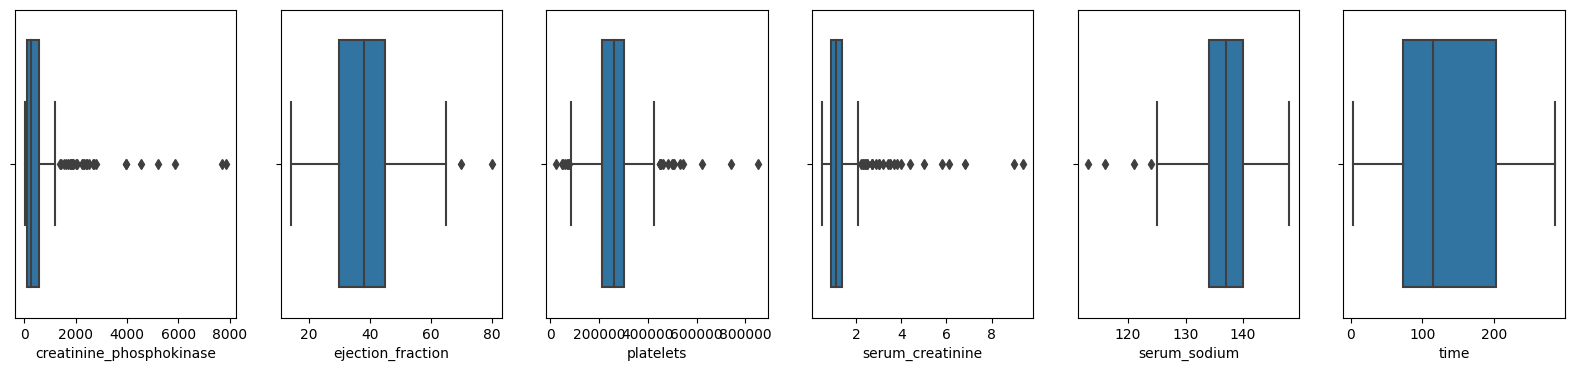

In [ ]:
numerical_features= ['creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine', 'serum_sodium','time']
fig, ax = plt.subplots(1, len(numerical_features), figsize=(20,4))
for i, numerical_feature in enumerate(df[numerical_features]):
  sns.boxplot(x=df[numerical_feature], ax =ax[i])


### Correlation between the independent variables

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 1.0, 'Variable Correlation')

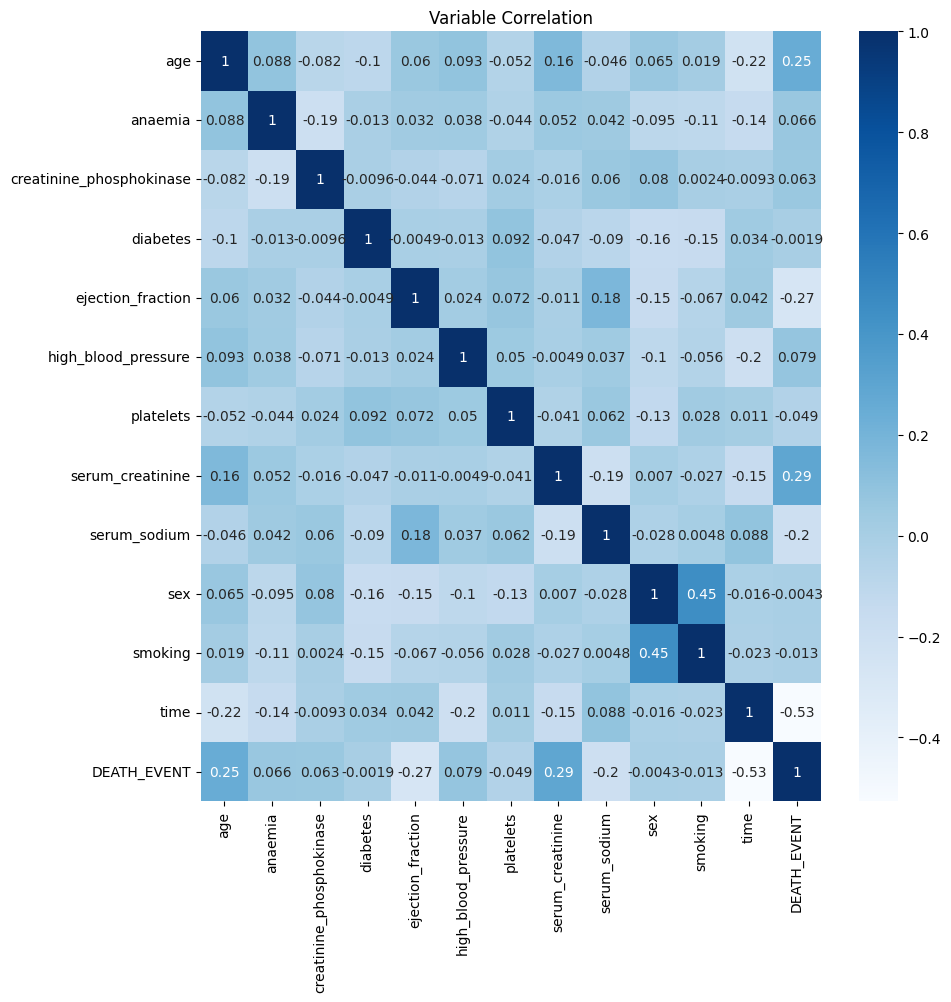

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap=plt.cm.Blues, ax =ax)
plt.title('Variable Correlation')

### Analysis of target variable

<Axes: >

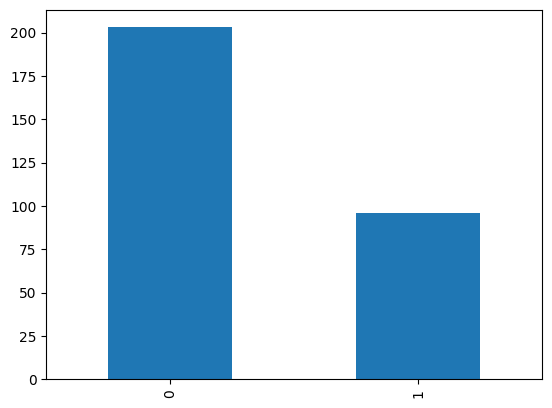

In [ ]:
df['DEATH_EVENT'].value_counts().plot(kind='bar')

In [ ]:
categorical_features=['anaemia','diabetes', 'high_blood_pressure','sex', 'smoking']

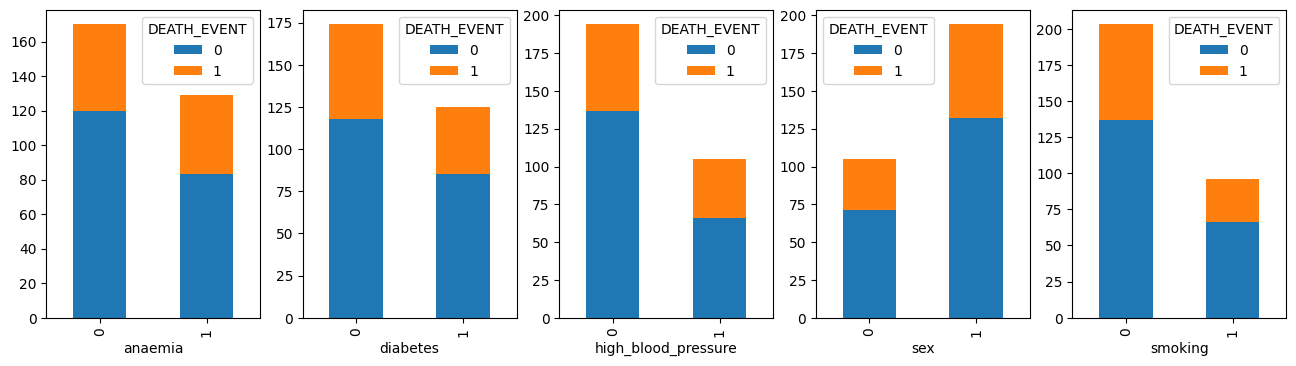

In [ ]:
fig, ax = plt.subplots(1, len(categorical_features))
for i, categorical_feature in enumerate(df[categorical_features]):
  pd.crosstab(df[categorical_feature], df['DEATH_EVENT'] ).plot(kind='bar', ax=ax[i], stacked=True, figsize=(16, 4))
fig.show()

### Setting up Validation Framework

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.DEATH_EVENT.values
y_val = df_val.DEATH_EVENT.values
y_test = df_test.DEATH_EVENT.values

del df_train['DEATH_EVENT']
del df_val['DEATH_EVENT']
del df_test['DEATH_EVENT']

### Feature Importance
Mutual Information (categorical features)

In [ ]:
from sklearn.metrics import mutual_info_score

In [ ]:
def mutual_info_churn_score(series):
  return mutual_info_score(df_full_train.DEATH_EVENT, series)

In [ ]:
mi = df_full_train[categorical_features].apply(mutual_info_churn_score)
mi.sort_values(ascending=False)

high_blood_pressure    0.001406
anaemia                0.000822
diabetes               0.000455
smoking                0.000091
sex                    0.000039
dtype: float64

Correlation (numerical features)

In [ ]:
numerical =set(df_full_train.columns)-set(categorical_features)-set(["DEATH_EVENT"])

In [ ]:
numerical

{'age',
 'creatinine_phosphokinase',
 'ejection_fraction',
 'platelets',
 'serum_creatinine',
 'serum_sodium',
 'time'}

In [ ]:
df_full_train[numerical].corrwith(df_full_train.DEATH_EVENT)


<ipython-input-20-dc385160fb6b>:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df_full_train[numerical].corrwith(df_full_train.DEATH_EVENT)


serum_creatinine            0.312228
time                       -0.519556
serum_sodium               -0.203004
ejection_fraction          -0.252100
platelets                  -0.069756
age                         0.226820
creatinine_phosphokinase    0.085204
dtype: float64

## Model Training and Parameter Tuning
Logistic Regression, Decision Tree, Random Fores and XGBoost Classifiers are trained and hyperparameters are tuned.
5-fold cross validation is used to validate the models. The ROC AUC scores are used to evaluate the classification performance of the models. The best model will be used for deployment.





In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.model_selection import KFold
from tqdm.auto import tqdm

In [ ]:
n_splits=5


### Logistic Regression

In [ ]:
for C in tqdm([0.001, 0.01, 0.1, 0.5, 1, 5, 10]):

  kfold =KFold(n_splits=n_splits, shuffle=True, random_state=1)

  scores = []

  for train_idx, val_idx in kfold.split(df_full_train):
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]

    y_train = df_train.DEATH_EVENT.values
    y_val = df_val.DEATH_EVENT.values

    del df_train['DEATH_EVENT']
    del df_val['DEATH_EVENT']

    lr= LogisticRegression()
    lr.fit(df_train,y_train)
    y_pred = lr.predict_proba(df_val)[:, 1]

    auc = roc_auc_score(y_val, y_pred)
    scores.append(auc)

  print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

  0%|          | 0/7 [00:00<?, ?it/s]

C=0.001 0.852 +- 0.030
C=0.01 0.852 +- 0.030
C=0.1 0.852 +- 0.030
C=0.5 0.852 +- 0.030
C=1 0.852 +- 0.030
C=5 0.852 +- 0.030
C=10 0.852 +- 0.030


### Decision Tree

In [ ]:
mean_scores=[]
for depth in [4, 5, 6]:
    for s in [1, 5, 10, 15, 20, 100]:

      kfold =KFold(n_splits=n_splits, shuffle=True, random_state=1)
      scores = []
      for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.DEATH_EVENT.values
        y_val = df_val.DEATH_EVENT.values

        del df_train['DEATH_EVENT']
        del df_val['DEATH_EVENT']

        dt= DecisionTreeClassifier(max_depth=depth, min_samples_leaf=s)
        dt.fit(df_train,y_train)
        y_pred = dt.predict_proba(df_val)[:, 1]

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)
      mean_scores.append((depth,s,np.mean(scores)))


In [ ]:
columns =['max_depth','min_samples_leaf','auc']
df_scores=pd.DataFrame(mean_scores,columns = columns)

In [ ]:
df_scores=df_scores.sort_values(by=['auc'], ascending=False)
df_scores

,max_depth,min_samples_leaf,auc
9,5,15,0.882191
15,6,15,0.882191
3,4,15,0.879536
10,5,20,0.876440
16,6,20,0.874003
4,4,20,0.871826
2,4,10,0.856486
14,6,10,0.856322
8,5,10,0.851376
1,4,5,0.846207


### Random Forest

In [ ]:
mean_scores = []

for d in [5, 6, 10]:
  for s in [1, 5, 10, 50]:
    for n in [10,20,50,100,150,200]:

        kfold =KFold(n_splits=n_splits, shuffle=True, random_state=1)
        scores = []
        for train_idx, val_idx in kfold.split(df_full_train):
          df_train = df_full_train.iloc[train_idx]
          df_val = df_full_train.iloc[val_idx]

          y_train = df_train.DEATH_EVENT.values
          y_val = df_val.DEATH_EVENT.values

          del df_train['DEATH_EVENT']
          del df_val['DEATH_EVENT']

          rf = RandomForestClassifier(n_estimators=n, max_depth=d, min_samples_leaf=s ,random_state=1)
          rf.fit(df_train,y_train)
          y_pred = rf.predict_proba(df_val)[:, 1]

          auc = roc_auc_score(y_val, y_pred)
          scores.append(auc)

        mean_scores.append((d,s,n,np.mean(scores)))


In [ ]:
columns =['max_depth','min_samples_leaf','n_estimators','auc']
df_scores=pd.DataFrame(mean_scores,columns = columns)

In [ ]:
df_scores= df_scores.sort_values(by=['auc'], ascending=False)
df_scores

,max_depth,min_samples_leaf,n_estimators,auc
58,10,5,150,0.906778
56,10,5,50,0.906322
59,10,5,200,0.905894
35,6,5,200,0.905030
32,6,5,50,0.904267
...,...,...,...,...
70,10,50,150,0.797869
22,5,50,150,0.797869
42,6,50,10,0.769430
18,5,50,10,0.769430


In [ ]:
y_full_train = df_full_train.DEATH_EVENT.values
X_full_train = df_full_train.drop('DEATH_EVENT', axis=1)


In [ ]:
rf = RandomForestClassifier(n_estimators=150, max_depth=10, min_samples_leaf=5 ,random_state=1)
rf.fit(X_full_train,y_full_train)
y_pred = rf.predict_proba(df_test)[:, 1]
auc = roc_auc_score(y_test, y_pred)

In [ ]:
auc

0.9565217391304348

In [ ]:
pati = {"age": 75, "anaemia": 1, "creatinine_phosphokinase": 81, "diabetes": 0, "ejection_fraction": 38, "high_blood_pressure": 1, "platelets": 368000, "serum_creatinine": 4, "serum_sodium": 131, "sex": 1, "smoking": 1, "time": 10}
mini_df = pd.DataFrame([pati])
y_pred = rf.predict_proba(mini_df)[0, 1]
y_pred

0.8433745350510055

### XGBoost

In [ ]:
!pip install xgboost


In [ ]:
import xgboost as xgb

In [ ]:
mean_scores = []

for d in [ 5, 6]:
  for n in [10, 50,20]:
    for e in [0.1,0.3,0.5,0.9]:

        kfold =KFold(n_splits=n_splits, shuffle=True, random_state=1)
        scores = []
        for train_idx, val_idx in kfold.split(df_full_train):
          df_train = df_full_train.iloc[train_idx]
          df_val = df_full_train.iloc[val_idx]

          y_train = df_train.DEATH_EVENT.values
          y_val = df_val.DEATH_EVENT.values

          del df_train['DEATH_EVENT']
          del df_val['DEATH_EVENT']

          model = xgb.XGBClassifier(eta=e,
                  n_estimators=n,
                  max_depth=d,
                  objective='binary:logistic',
                  nthread=8,
                  seed=1,
                  verbosity=1)
          model.fit(df_train, y_train)
          y_pred = model.predict_proba(df_val)[:, 1]

          auc = roc_auc_score(y_val, y_pred)
          scores.append(auc)
        mean_scores.append((d,n,e,np.mean(scores)))

        print('depth=%s estimators=%s eta=%s %.3f +- %.3f' % (d, n,e, np.mean(scores), np.std(scores)))

depth=5 estimators=10 eta=0.1 0.881 +- 0.034
depth=5 estimators=10 eta=0.3 0.888 +- 0.037
depth=5 estimators=10 eta=0.5 0.885 +- 0.031
depth=5 estimators=10 eta=0.9 0.905 +- 0.035
depth=5 estimators=50 eta=0.1 0.896 +- 0.033
depth=5 estimators=50 eta=0.3 0.902 +- 0.038
depth=5 estimators=50 eta=0.5 0.898 +- 0.036
depth=5 estimators=50 eta=0.9 0.892 +- 0.042
depth=5 estimators=20 eta=0.1 0.880 +- 0.036
depth=5 estimators=20 eta=0.3 0.903 +- 0.040
depth=5 estimators=20 eta=0.5 0.900 +- 0.035
depth=5 estimators=20 eta=0.9 0.896 +- 0.036
depth=6 estimators=10 eta=0.1 0.877 +- 0.034
depth=6 estimators=10 eta=0.3 0.887 +- 0.033
depth=6 estimators=10 eta=0.5 0.900 +- 0.036
depth=6 estimators=10 eta=0.9 0.875 +- 0.033
depth=6 estimators=50 eta=0.1 0.891 +- 0.031
depth=6 estimators=50 eta=0.3 0.898 +- 0.041
depth=6 estimators=50 eta=0.5 0.894 +- 0.036
depth=6 estimators=50 eta=0.9 0.885 +- 0.030
depth=6 estimators=20 eta=0.1 0.878 +- 0.038
depth=6 estimators=20 eta=0.3 0.900 +- 0.038
depth=6 es

In [ ]:
columns =['max_depth','n_estimators','eta','auc']
df_scores=pd.DataFrame(mean_scores,columns = columns)

In [ ]:
df_scores= df_scores.sort_values(by=['auc'], ascending=False)
df_scores

,max_depth,n_estimators,eta,auc
3,5,10,0.9,0.904733
9,5,20,0.3,0.903043
5,5,50,0.3,0.901804
14,6,10,0.5,0.900160
21,6,20,0.3,0.899929
10,5,20,0.5,0.899854
22,6,20,0.5,0.898438
17,6,50,0.3,0.898111
6,5,50,0.5,0.898085
11,5,20,0.9,0.896294


In [ ]:
model = xgb.XGBClassifier(eta=0.9,
        n_estimators=10,
        max_depth=5,
        objective='binary:logistic',
        nthread=8,
        seed=1,
        verbosity=1)
model.fit(X_full_train, y_full_train)
y_pred = model.predict_proba(df_test)[:, 1]
auc = roc_auc_score(y_test, y_pred)

In [ ]:
auc

0.9145962732919254

## Conclusion

I will continue to model deployment with Random Forest model and its optimal parameters for the given dataset as it relevealed the highest AUC value in 5-fold cross-validation.

